In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud, STOPWORDS

In [2]:
FILENAME_DATASET = 'Dataset/global_terrorism_database.csv'

df = pd.read_csv(FILENAME_DATASET, sep=',', index_col=False)
pd.options.mode.chained_assignment = None  # default='warn'
df.head()

/home/killinsteak/.venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Question 1

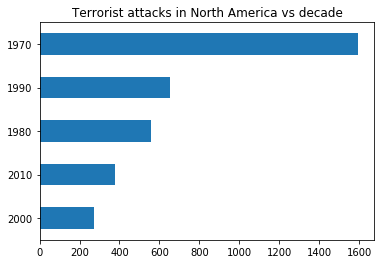

In [3]:
# Ques 1
dfNorthAmerica = df[df.region_txt == 'North America']

for index,row in dfNorthAmerica.iterrows():
    dfNorthAmerica['iyear'][index] = math.floor(dfNorthAmerica['iyear'][index]/10)*10

_ = dfNorthAmerica['iyear'].value_counts(ascending=True).plot(kind='barh', title='Terrorist attacks in North America vs decade')

As we can see from the above histogram that most number of Terrorist attacks in North America happened in 1970s.

# Question 2

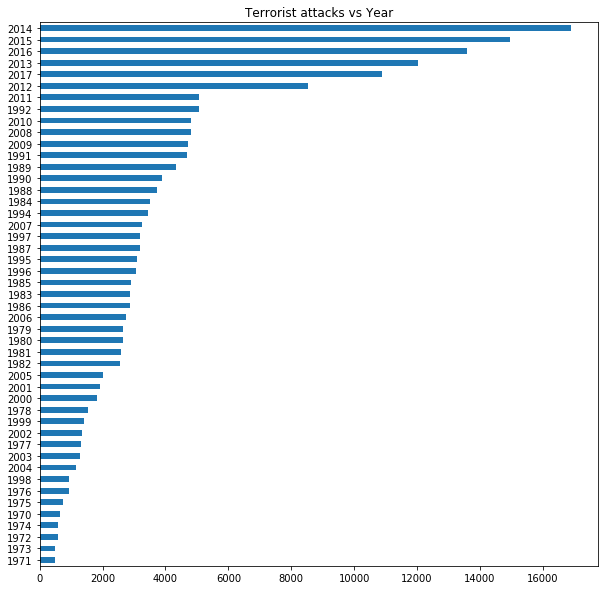

In [4]:
ax = df['iyear'].value_counts(ascending=True).plot(figsize=(10,10), x = 'Frequency' ,kind='barh', title='Terrorist attacks vs Year')
# plt.show()

As we can see from the above histogram that most number of Terrorist attacks happened in 2014.

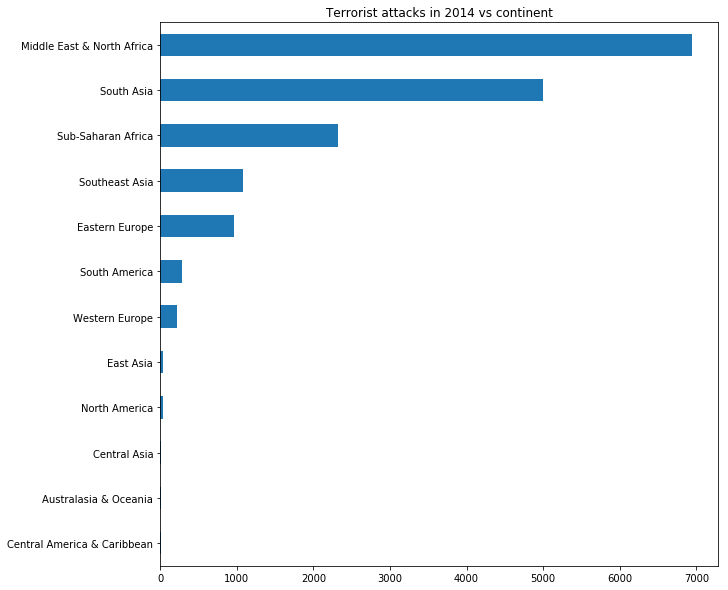

In [5]:
df2014 = df[df.iyear == 2014]
ax = df2014['region_txt'].value_counts(ascending=True).plot(figsize=(10,10), x = 'Frequency' ,kind='barh', title='Terrorist attacks in 2014 vs continent')

As we can see from the above histogram that most number of Terrorist attacks in 2014 happened in Middle East & North America.

# Question 3

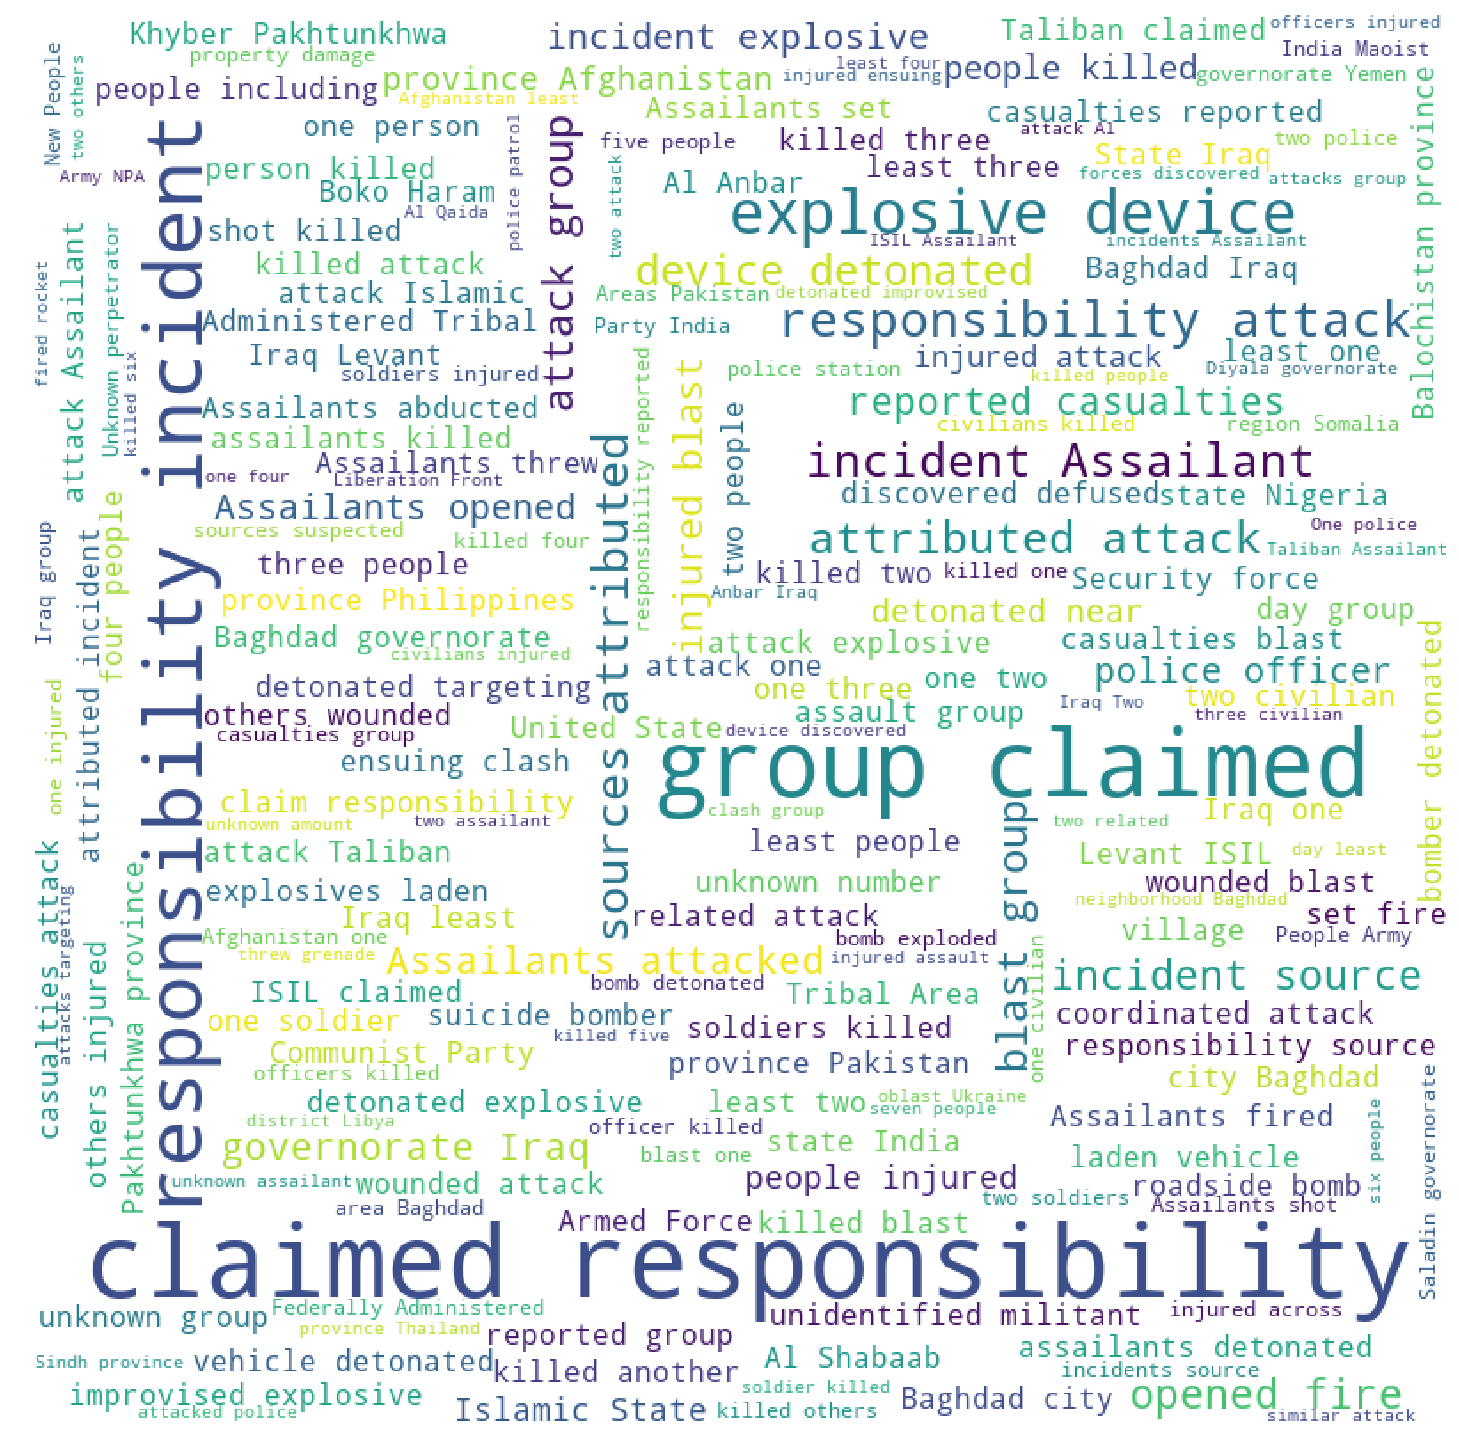

In [6]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in df['summary']:
    val = str(val) 
    tokens = val.split()
    if len(tokens)==0:
        continue
    else:
        tokens = tokens[1:]
        comment_words+= ' '.join(tokens)
          
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (20, 20) )
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

One of the most prominent word coming is of `claimed responsibility`. This is because these terrorist attacks are conducted by various terrorist groups and after the incident takes place, these terroris groups come forward to tell who committed the crime.

The other prominent word is related to `explosives` and `detonation` which indicates high number of crimes take place with help of explosives.

There's an occasional mention of `open firing`, thus these two word clouds suggest higher number of crimes occur due to explosives than firing.

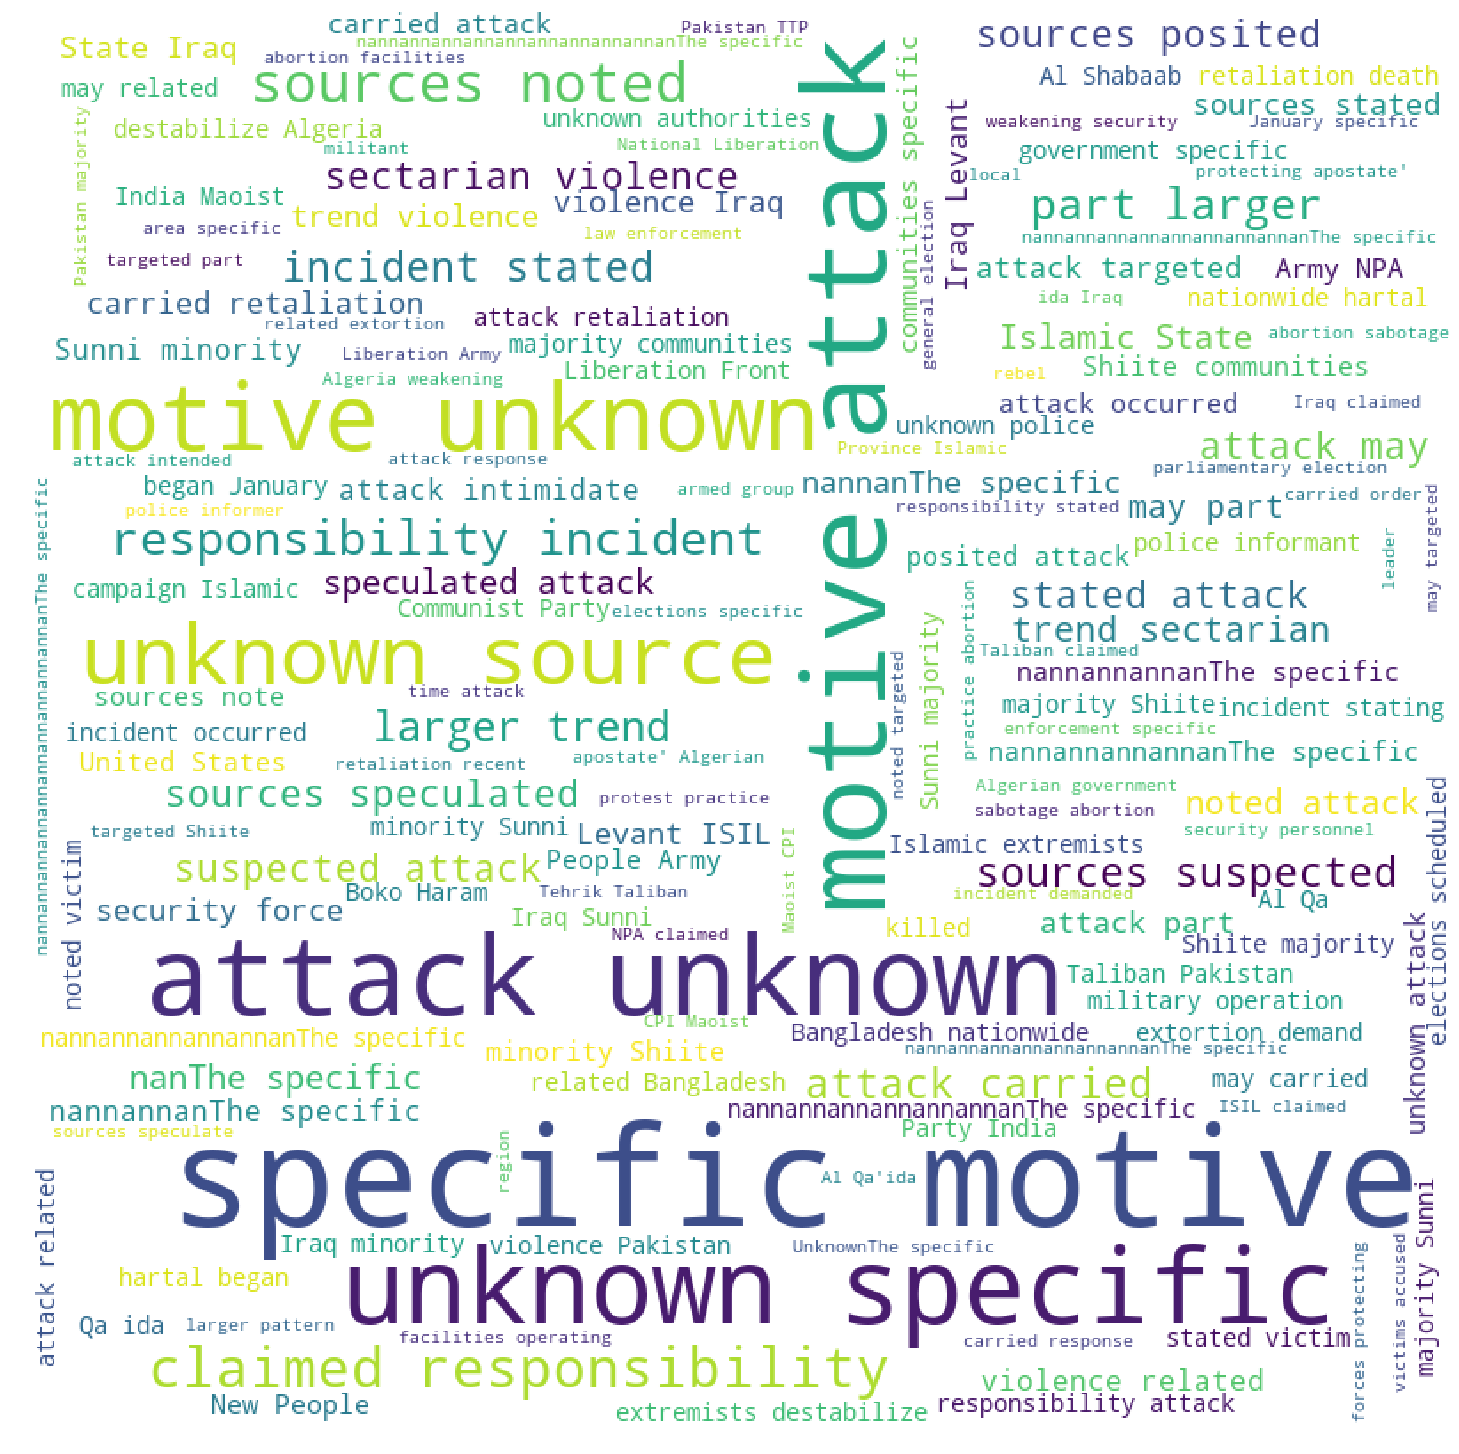

In [7]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in df['motive']:
    val = str(val) 
    tokens = val.split()
    if len(tokens)==0:
        continue
    else:
        comment_words+= ' '.join(tokens)
          
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (20, 20) )
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

The major motive of violence are Islamic extremists, communal violence, following of a larger trend.

Also some wordclouds indicate link to Islamic extremists and Pakistan.